### Data 100 Final Project

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

import warnings
warnings.filterwarnings("ignore")
!pip install imblearn

In [ ]:
from sklearn.utils import shuffle

contraceptive_dset = pd.read_csv('contraceptive_for_students.csv')
contraceptive_dset = shuffle(contraceptive_dset, random_state = 78)

contraceptive_dset.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
1172,34,3,4,4,0,1,3,1,1,1
770,26,4,4,3,1,1,3,4,0,3
442,46,4,4,2,1,0,1,4,0,2
1115,21,4,4,1,1,1,3,4,0,1
1086,27,4,4,2,1,0,1,4,0,1


#### Exploratory Data Visualizations

Text(0.5, 1.0, 'Distribution of Wife Age')

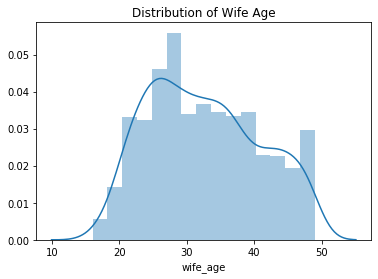

In [ ]:
sns.distplot(contraceptive_dset['wife_age']).set_title('Distribution of Wife Age')

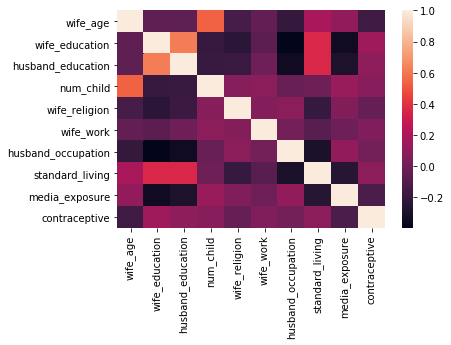

In [ ]:
sns.heatmap(contraceptive_dset.corr()) #checking initial correlation between x variables and y

In [ ]:
contraceptive_dset.var() #check variance

wife_age              67.687556
wife_education         1.030213
husband_education      0.666425
num_child              5.562753
wife_religion          0.127134
wife_work              0.187882
husband_occupation     0.747978
standard_living        0.952889
media_exposure         0.068569
contraceptive          0.768035
dtype: float64

Text(0.5, 1.0, 'Wife Age vs. Number of Children')

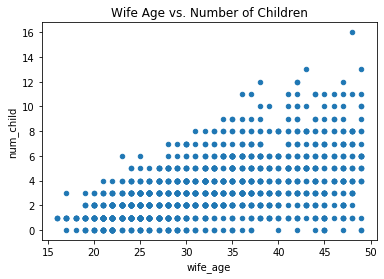

In [ ]:
contraceptive_dset.plot.scatter(x='wife_age', y='num_child').set_title('Wife Age vs. Number of Children')

Text(0.5, 1.0, 'Distribution of Contraceptive Methods Among Wife Ages')

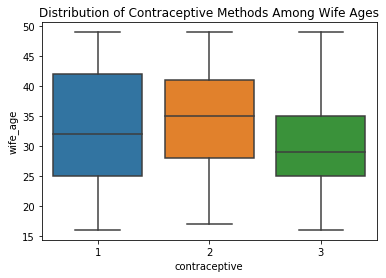

In [ ]:
#grouping x variables by each contraceptive
import seaborn as sns
sns.boxplot(x=contraceptive_dset['contraceptive'], y=contraceptive_dset['wife_age']).set_title('Distribution of Contraceptive Methods Among Wife Ages')

Text(0.5, 1.0, 'Distribution of Contraceptive Methods Among Number of Children')

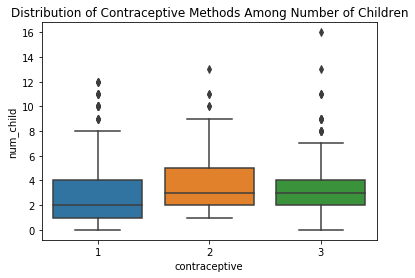

In [ ]:
sns.boxplot(x=contraceptive_dset['contraceptive'], y=contraceptive_dset['num_child']).set_title('Distribution of Contraceptive Methods Among Number of Children')

Text(0.5, 1.0, 'Count per Husband Occupation and Contraceptive Method')

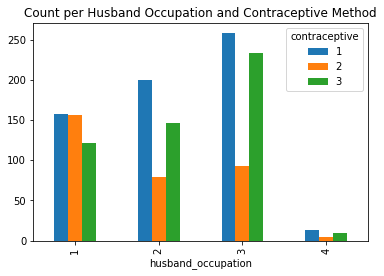

In [ ]:
df2 = pd.pivot_table(contraceptive_dset.groupby(["husband_occupation", "contraceptive"]).size().reset_index(name='Count'),
                     values='Count',
                     columns=['contraceptive'],
                     index = "husband_occupation", aggfunc=np.sum,
                     fill_value=0)
df2.plot(kind="bar").set_title('Count per Husband Occupation and Contraceptive Method')

Text(0.5, 1.0, 'Count per Standard Living and Contraceptive Method')

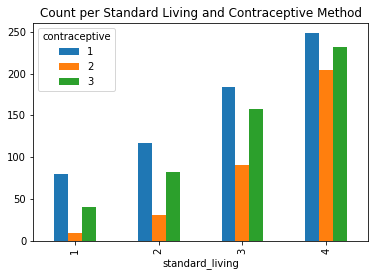

In [ ]:
df2 = pd.pivot_table(contraceptive_dset.groupby(["standard_living", "contraceptive"]).size().reset_index(name='Count'),
                     values='Count',
                     columns=['contraceptive'],
                     index = "standard_living", aggfunc=np.sum,
                     fill_value=0)
df2.plot(kind="bar").set_title('Count per Standard Living and Contraceptive Method')

Text(0.5, 1.0, 'Count per Wife Education and Contraceptive Method')

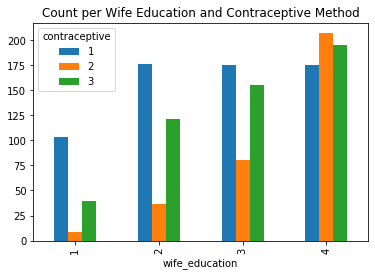

In [ ]:
df2 = pd.pivot_table(contraceptive_dset.groupby(["wife_education", "contraceptive"]).size().reset_index(name='Count'),
                     values='Count',
                     columns=['contraceptive'],
                     index = "wife_education", aggfunc=np.sum,
                     fill_value=0)
df2.plot(kind="bar").set_title('Count per Wife Education and Contraceptive Method')

Text(0.5, 1.0, 'Correlations Between X Variables and Contraceptive')

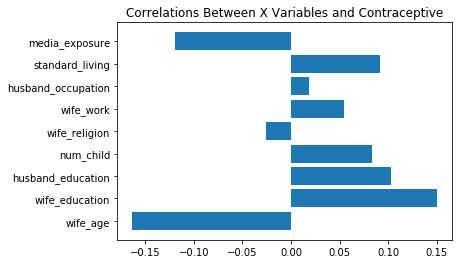

In [ ]:
correlations = contraceptive_dset.corr()
correlations = correlations.iloc[:9, :]
plt.pyplot.barh(correlations.index, correlations['contraceptive'])
plt.pyplot.title('Correlations Between X Variables and Contraceptive')

Covariance Matrix


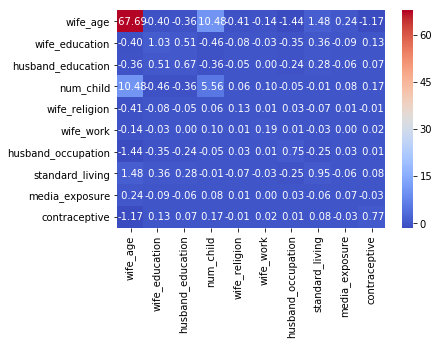

In [ ]:
print('Covariance Matrix')
covariance = contraceptive_dset.cov() #checking covariance between variables
sns.heatmap(covariance,cbar=True,fmt =' .2f', annot=True, cmap='coolwarm')

#### Baseline Model

Predicts the most prevalent class.

In [ ]:
contraceptive_dset[['contraceptive']].groupby('contraceptive').size()

contraceptive
1    629
2    333
3    511
dtype: int64

In [ ]:
baseline_accuracy = 627/(629+333+511)
print('Baseline Model Accuracy:', np.round(baseline_accuracy, 4) * 100, '%')

Baseline Model Accuracy: 42.57 %


#### Data Cleaning and Feature Engineering

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def ohe(data, column):

    oh_enc = OneHotEncoder()
    oh_enc.fit(data[[column]])
    oh_enc.get_feature_names()
    encoded_matrix = oh_enc.transform(data[[column]]).todense()
    encoded_data = pd.DataFrame(encoded_matrix)
    if (data[column] == 0).any():
        encoded_data.columns=[column + '_0', column + '_1']
    else:
        encoded_data.columns=[column + '_1', column + '_2', column + '_3', column + '_4']
    data = data.join(encoded_data)
    data = data.drop(column, axis=1)

    return data

#one-hot encoding numerical variables
contraceptive_dset = ohe(contraceptive_dset, 'wife_education')
contraceptive_dset = ohe(contraceptive_dset, 'husband_education')
contraceptive_dset = ohe(contraceptive_dset, 'wife_religion')
contraceptive_dset = ohe(contraceptive_dset, 'wife_work')
contraceptive_dset = ohe(contraceptive_dset, 'husband_occupation')
contraceptive_dset = ohe(contraceptive_dset, 'standard_living')
contraceptive_dset = ohe(contraceptive_dset, 'media_exposure')
contraceptive_dset = contraceptive_dset.fillna(0)
contraceptive_dset.head()

,wife_age,num_child,contraceptive,wife_education_1,wife_education_2,wife_education_3,wife_education_4,husband_education_1,husband_education_2,husband_education_3,...,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4,standard_living_1,standard_living_2,standard_living_3,standard_living_4,media_exposure_0,media_exposure_1
1172,34,4,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
770,26,3,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
442,46,2,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1115,21,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1086,27,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


##### Normalize Data

In [ ]:
def normalize(col):
    return (col - min(col)) / (max(col) - min(col))

contraceptive_dset['wife_age'] = normalize(contraceptive_dset['wife_age'])
contraceptive_dset['num_child'] = normalize(contraceptive_dset['num_child'])

##### Feature Engineering

In [ ]:
contraceptive_dset['wife_age**2'] = contraceptive_dset['wife_age'] ** 2

In [ ]:
contraceptive_dset['wife_age*num_child'] = contraceptive_dset['wife_age'] * contraceptive_dset['num_child']

In [ ]:
contraceptive_dset['wife_ed4*num_child'] = contraceptive_dset['wife_education_4'] * contraceptive_dset['num_child']
contraceptive_dset['wife_ed1*num_child'] = contraceptive_dset['wife_education_1'] * contraceptive_dset['num_child']

In [ ]:
contraceptive_dset['wife_ed1**2'] = contraceptive_dset['wife_education_1']**2
contraceptive_dset['wife_ed4**2'] = contraceptive_dset['wife_education_4']**2

In [ ]:
contraceptive_dset['standard_living1**2'] = contraceptive_dset['standard_living_1'] **2
contraceptive_dset['standard_living3**2'] = contraceptive_dset['standard_living_3'] **2

In [ ]:
contraceptive_dset['wife_religion1*num_child'] = contraceptive_dset['wife_religion_1'] * contraceptive_dset['num_child']

In [ ]:
contraceptive_dset['ed1*media'] = contraceptive_dset['wife_education_1'] * contraceptive_dset['media_exposure_1']

In [ ]:
contraceptive_dset['wife_age*wife_ed4'] = contraceptive_dset['wife_education_4'] * contraceptive_dset['wife_age']
contraceptive_dset['wife_age*wife_ed1'] = contraceptive_dset['wife_education_1'] * contraceptive_dset['wife_age']

#### Break Into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(contraceptive_dset, test_size=0.15, random_state=0)
X_train, Y_train = train.drop('contraceptive', axis=1), train.iloc[:,2]
X_test, Y_test = test.drop('contraceptive', axis=1), test.iloc[:,2]

print('Number of items in training set:', len(X_train))
print('Number of items in the test set:', len(X_test))

Number of items in training set: 1252
Number of items in the test set: 221


In [ ]:
from imblearn.over_sampling import SMOTE # oversampling; creates a more balanced dataset
sm = SMOTE(random_state = 1)

X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train)

#### Fit Models

In [ ]:
# logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(penalty='l2', random_state = 100)
scores_logistic_regression = cross_val_score(model, X_train_res, Y_train_res, cv=5)

print("Cross-Validated Training Accuracy: %0.2f (+/- %0.2f)" % (scores_logistic_regression.mean(), scores_logistic_regression.std() * 2))

Cross-Validated Training Accuracy: 0.47 (+/- 0.07)


In [ ]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 100)
scores_random_forest = cross_val_score(model, X_train_res, Y_train_res, cv=5)

print("Cross-Validated Training Accuracy: %0.2f (+/- %0.2f)" % (scores_random_forest.mean(), scores_random_forest.std() * 2))

Cross-Validated Training Accuracy: 0.57 (+/- 0.14)


In [ ]:
# support vector machine

from sklearn.svm import SVC

model = SVC(gamma='auto', random_state = 100)
scores_svc = cross_val_score(model, X_train_res, Y_train_res, cv=5)

print("Cross-Validated Training Accuracy: %0.2f (+/- %0.2f)" % (scores_svc.mean(), scores_svc.std() * 2))

Cross-Validated Training Accuracy: 0.43 (+/- 0.04)


In [ ]:
# grid search to find best model parameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

model = RandomForestClassifier(random_state=100)
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train_res, Y_train_res)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
# updated random forest classifier

final_model = RandomForestClassifier(random_state=100, max_features='auto', n_estimators=500, max_depth=8, criterion='gini')
final_model.fit(X_train_res, Y_train_res)
scores_random_forest = cross_val_score(final_model, X_train_res, Y_train_res, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores_random_forest.mean(), scores_random_forest.std() * 2))

Accuracy: 0.57 (+/- 0.11)


In [ ]:
print('Training improvement over baseline model:', np.round((scores_random_forest.mean() - baseline_accuracy), 5) * 100 , '%')

Training improvement over baseline model: 14.37 %


#### Test Set Accuracy

In [ ]:
test_acc = final_model.score(X_test, Y_test)
print('Test Accuracy:', np.round(test_acc, 5))

Test Accuracy: 0.55656


In [ ]:
print('Training improvement over baseline model:', np.round((test_acc - baseline_accuracy),2) * 100 , '%')

Training improvement over baseline model: 13.0 %
